# Parábola

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn  # nn = neural network
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline


# import my own libraries
import sys
sys.path.append('../myUtils')
import rndData as myData
import text
import myGraph

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")  # set plot format to svg

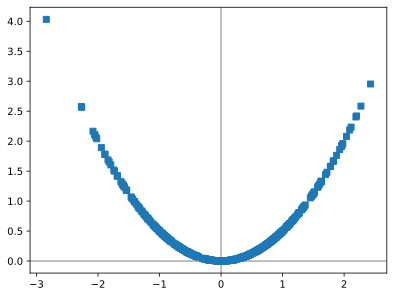

tensor([[-0.5289],
        [ 0.5477],
        [-0.5529],
        [ 0.3668],
        [ 0.7952],
        [ 1.2715],
        [-0.1711],
        [ 0.4533],
        [ 1.9795],
        [-0.1101],
        [ 0.8923],
        [ 0.1304],
        [ 0.3123],
        [ 1.0730],
        [ 0.1770],
        [-0.4340],
        [ 0.9727],
        [-0.5371],
        [-0.1556],
        [ 0.8923],
        [ 0.3453],
        [-0.5536],
        [-0.1977],
        [ 0.8609],
        [-1.5979],
        [ 0.9620],
        [-0.8185],
        [ 0.1152],
        [-1.5357],
        [ 0.8674],
        [ 0.1036],
        [ 0.2398],
        [-1.1903],
        [ 0.6519],
        [ 0.2901],
        [ 0.4293],
        [ 0.7522],
        [-0.3937],
        [ 1.5136],
        [ 0.8171],
        [ 1.6287],
        [-0.8885],
        [-0.6730],
        [ 0.9017],
        [ 1.2535],
        [-1.3786],
        [-0.0861],
        [ 0.7893],
        [-1.7909],
        [-0.4400],
        [ 0.1225],
        [ 0.8264],
        [-0.

In [2]:
# create data

from sympy import true

N = 500
x = torch.randn(N, 1)
y = x**2/2 # + torch.randn(N, 1) / 100

myGraph.showAxes(plt)

# and plot
plt.plot(x, y, "s")

plt.show()

x

In [3]:
def build_model(width=2, depth=2, activation=nn.ELU):
    layers = []
    layers.append(nn.Linear(1, width))
    layers.append(activation())

    for i in range(depth):
        layers.append(nn.Linear(width, width))
        layers.append(activation())
    
    layers.append(nn.Linear(width, 1))
    layers.append(nn.Identity())
    
    return nn.Sequential(*layers)




In [4]:
def train_model(model, x, y, num_epochs=500, learning_rate=0.05):
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = torch.zeros(num_epochs)

    for epoch_i in range(num_epochs):
        yHat = model(x)
        loss = lossfun(yHat, y)
        losses[epoch_i] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses



In [5]:
def plot_loss(losses):
    plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Final loss = %g" % losses[-1].item())
    plt.show()



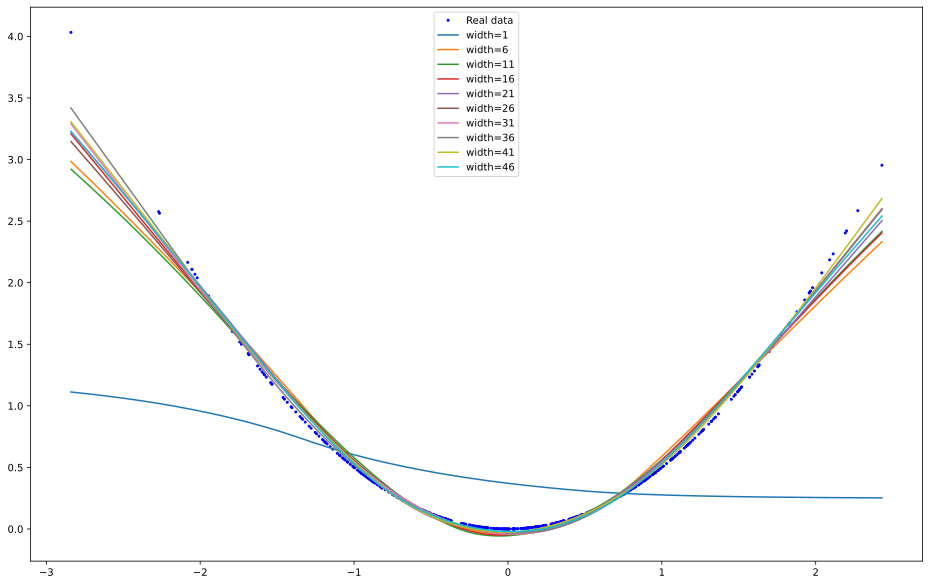

In [8]:
ls = np.linspace(min(x), max(x), 200)
lsr = ls.reshape(200,1)
x1 = torch.Tensor(lsr)

fig = plt.figure(figsize=(16, 10))
# plot the data
plt.plot(x, y, "bo", label="Real data", markersize=2)

Y = []

for width in range(1, 51, 5):
    model = build_model(depth=2, width=width)
    train_model(model, x, y)
    
    Y.append(model(x1))

# plot all the predictions on the same plot. Use different colors for different widths
for i in range(len(Y)):
    plt.plot(ls, Y[i].detach(), label="width=%d" % (i*5+1))

plt.legend()
plt.show()



# Additional explorations

In [7]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.